---
|NaN|작업중|작업대기|작업정지|STOP|알람중|
|---|---|---|---|---|---|
|0|1|2|3|4|5|
---
||df1|df2|df3|df4|df5|df6|df7|df8|df9|df10|df11|
|---|---|---|---|---|---|---|---|---|---|---|---|
|기간|3일|6일|5일|7일|7일|7일|7일|1일|5일|7일|6일|
|누락(초)|2118|16116|25488|29257|4227|4472|4701|553|2042|2946|2295|

- 7월4일 ~ 7월12일 데이터 없음
- df9 ~ df11까지 의도적으로 데이터를 삭제한 것으로 보임. (스핀들온도, G_ADC1, G_ADC2로 파악 가능)
---
- 모두 1초 간격이 아님. 데이터 수집에서 초당 데이터가 누락된 부분이 있다 (df8,df10,df11은 누락 없음)
- 즉 1분 평균 리샘플링을 하면 결측치가 생김
---
- F_RunState / F_OperationTime / F_CuttingTime / F_ToolNum 모두 결측치를 fillna(0)
---
- X,Y,Z 총 6개 열 drop
---
- 05 ~ 07 까지 2시간 정지
- 17 ~ 19시30분 까지 2시간 30분 정지 
---
- 공정주기와 툴넘버로 공정제품 확인 가능할 듯
- 제품 2개 공정 (df2 a제품-> df3 b제품)
- 데이터의 의도적 손실 부분에서 제품 1 + a개 공정했을 것으로 예상

In [1]:
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
data = pd.DataFrame()
data_list = []
for filename in os.listdir('mct31_data'):
    raw_data = pd.read_csv('mct31_data/' + filename)
    raw_data['GDatetime'] = pd.to_datetime(raw_data['GDatetime']).dt.round('S')
    raw_data.set_index('GDatetime', inplace=True)
    raw_data['F_RunState'] = raw_data['F_RunState'].map(lambda x: 1 if x == '작업중' else 2 if x == '작업대기' else 3 if x == '작업정지' else 4 if x == 'STOP' else 5 if x == '알람중' else 0)
    raw_data['F_OperationTime'] = raw_data['F_OperationTime'].fillna(0)
    raw_data['F_CuttingTime'] = raw_data['F_CuttingTime'].fillna(0)
    raw_data['F_ToolNum'] = raw_data['F_ToolNum'].fillna(0)
    raw_data.drop(['F_AbsoluteX', 'F_AbsoluteY', 'F_AbsoluteZ', 'F_DistanceX', 'F_DistanceY', 'F_DistanceZ'], axis=1, inplace=True)
    data_list.append(raw_data.iloc[:, :-6])

df1 = data_list[0]
df2 = data_list[1]
df3 = data_list[2]
df4 = data_list[3]
df5 = data_list[4]
df6 = data_list[5]
df7 = data_list[6]
df8 = data_list[7]
df9 = data_list[8]
df10 = data_list[9]
df11 = data_list[10]

data = pd.concat(data_list, axis=0)
data

F_RunState  F_OperationTime  F_CuttingTime  F_CycleTime  \
GDatetime                                                                      
2023-05-18 14:38:25           1         431109.0       170253.0         1858   
2023-05-18 14:38:26           1         431109.0       170253.0         1858   
2023-05-18 14:38:27           1         431110.0       170254.0         1859   
2023-05-18 14:38:28           1         431112.0       170255.0         1901   
2023-05-18 14:38:29           1         431113.0       170256.0         1902   
...                         ...              ...            ...          ...   
2023-07-29 07:45:15           0              0.0            0.0            0   
2023-07-29 07:45:16           0              0.0            0.0            0   
2023-07-29 07:45:17           0              0.0            0.0            0   
2023-07-29 07:45:18           0              0.0            0.0            0   
2023-07-29 07:45:19           0              0.0            0.0            0   

                     F_SpindleRPM1  F_SpindleTroq1  F_SpindleGearRatio1  \
GDatetime                                                                 
2023-05-18 14:38:25         2133.0             7.0                680.0   
2023-05-18 14:38:26         2133.0             7.0                680.0   
2023-05-18 14:38:27         2133.0             7.0                680.0   
2023-05-18 14:38:28         2132.0             4.0                680.0   
2023-05-18 14:38:29         2133.0             7.0                680.0   
...                            ...             ...                  ...   
2023-07-29 07:45:15            0.0             0.0                  0.0   
2023-07-29 07:45:16            0.0             0.0                  0.0   
2023-07-29 07:45:17            0.0             0.0                  0.0   
2023-07-29 07:45:18            0.0             0.0                  0.0   
2023-07-29 07:45:19            0.0             0.0                  0.0   

                     F_ToolNum     G_ADC1     G_ADC2  G_ADC3  G_ADC4  \
GDatetime                                                              
2023-05-18 14:38:25       40.0  32.599998  38.599998     1.0    0.56   
2023-05-18 14:38:26       40.0  32.599998  38.599998     1.0    0.56   
2023-05-18 14:38:27       40.0  32.599998  38.599998     1.0    0.56   
2023-05-18 14:38:28       40.0  32.599998  38.599998     0.0    0.56   
2023-05-18 14:38:29       40.0  32.500000  38.599998     0.0    0.56   
...                        ...        ...        ...     ...     ...   
2023-07-29 07:45:15        0.0  33.599998  54.500000     0.0    0.56   
2023-07-29 07:45:16        0.0  33.599998  54.500000     0.0    0.56   
2023-07-29 07:45:17        0.0  33.599998  54.500000     0.0    0.56   
2023-07-29 07:45:18        0.0  33.500000  54.500000     0.0    0.56   
2023-07-29 07:45:19        0.0  33.599998  54.500000     0.0    0.56   

                           G_MV    G_MA  G_MActP  G_MRActP  G_MPF     G_MFeq  \
GDatetime                                                                      
2023-05-18 14:38:25  216.910004  17.107    4.384     4.152  0.590  59.990002   
2023-05-18 14:38:26  216.910004  17.107    4.384     4.152  0.590  59.990002   
2023-05-18 14:38:27  216.910004  17.107    4.384     4.152  0.590  59.990002   
2023-05-18 14:38:28  216.619995  17.635    4.552     4.180  0.595  59.990002   
2023-05-18 14:38:29  216.919998  16.782    4.256     4.140  0.584  59.990002   
...                         ...     ...      ...       ...    ...        ...   
2023-07-29 07:45:15  225.149994   0.065    0.004     0.004  0.249  60.009998   
2023-07-29 07:45:16  225.059998   0.065    0.004     0.004  0.249  60.009998   
2023-07-29 07:45:17  225.059998   0.065    0.004     0.004  0.249  60.009998   
2023-07-29 07:45:18  225.270004   0.065    0.004     0.004  0.250  60.009998   
2023-07-29 07:45:19  225.330002   0.065    0.004     0.004  0.248  60.009998   

                     G_MTe

In [ ]:
df1.index.min(), df1.index.max()

(Timestamp('2023-05-18 14:38:25'), Timestamp('2023-05-20 07:00:36'))

# 데이터 누락 찾기

In [ ]:
# 완전한 시계열 인덱스 생성
full_index = pd.date_range(start=df11.index.min(), end=df11.index.max(), freq='S')

# 누락된 인덱스 찾기
missing_dates = full_index.difference(df11.index)

pd.DataFrame(missing_dates)

0
0    2023-07-24 00:02:13
1    2023-07-24 00:06:42
2    2023-07-24 00:10:51
3    2023-07-24 00:15:09
4    2023-07-24 00:18:48
...                  ...
2290 2023-07-29 07:34:04
2291 2023-07-29 07:37:31
2292 2023-07-29 07:37:33
2293 2023-07-29 07:37:35
2294 2023-07-29 07:42:20

[2295 rows x 1 columns]

In [ ]:
# df = pd.read_csv('mct31_merged.csv')
# df.drop(['Unnamed: 0', 'F_AbsoluteX', 'F_AbsoluteY', 'F_AbsoluteZ', 'F_DistanceX', 'F_DistanceY', 'F_DistanceZ'], axis=1, inplace=True)
# df['F_RunState'] = df['F_RunState'].map(lambda x: 1 if x == '작업중' else 2 if x == '작업대기' else 3 if x == '작업정지' else 4 if x == 'STOP' else 5 if x == '알람중' else 0)
# df['F_OperationTime'] = df['F_OperationTime'].fillna(0)
# df['F_CuttingTime'] = df['F_CuttingTime'].fillna(0)
# df['F_ToolNum'] = df['F_ToolNum'].fillna(0)
# df['GDatetime'] = pd.to_datetime(df['GDatetime']).dt.round('S')
# df.set_index('GDatetime', inplace=True)
# df

In [ ]:
# df['F_RunState'] = df['F_RunState'].map(lambda x: 1 if x == '작업중' else 2 if x == '작업대기' else 3 if x == '작업정지' else 4 if x == 'STOP' else 5 if x == '알람중' else 0)
# df['F_OperationTime'] = df['F_OperationTime'].fillna(0)
# df['F_CuttingTime'] = df['F_CuttingTime'].fillna(0)

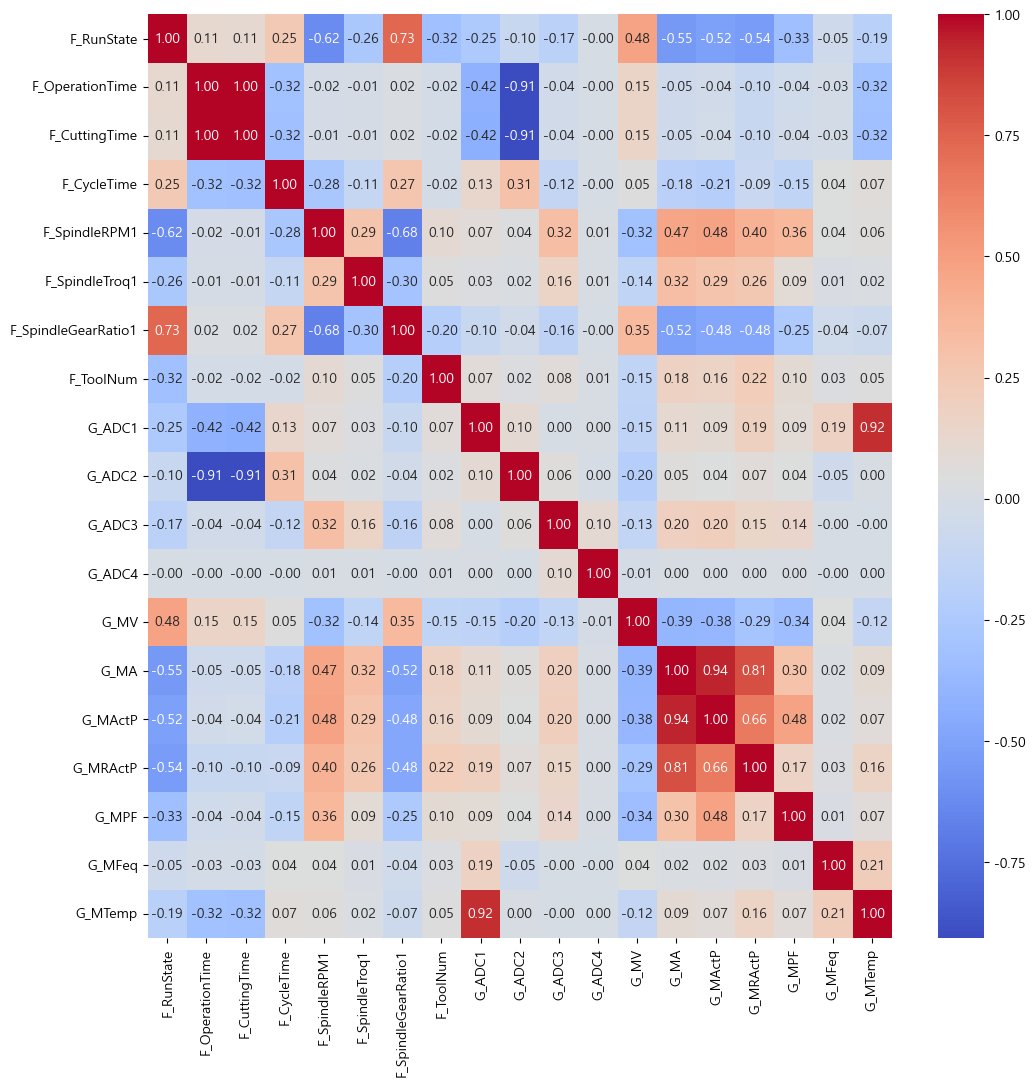

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm', fmt='.2f')
plt.show()

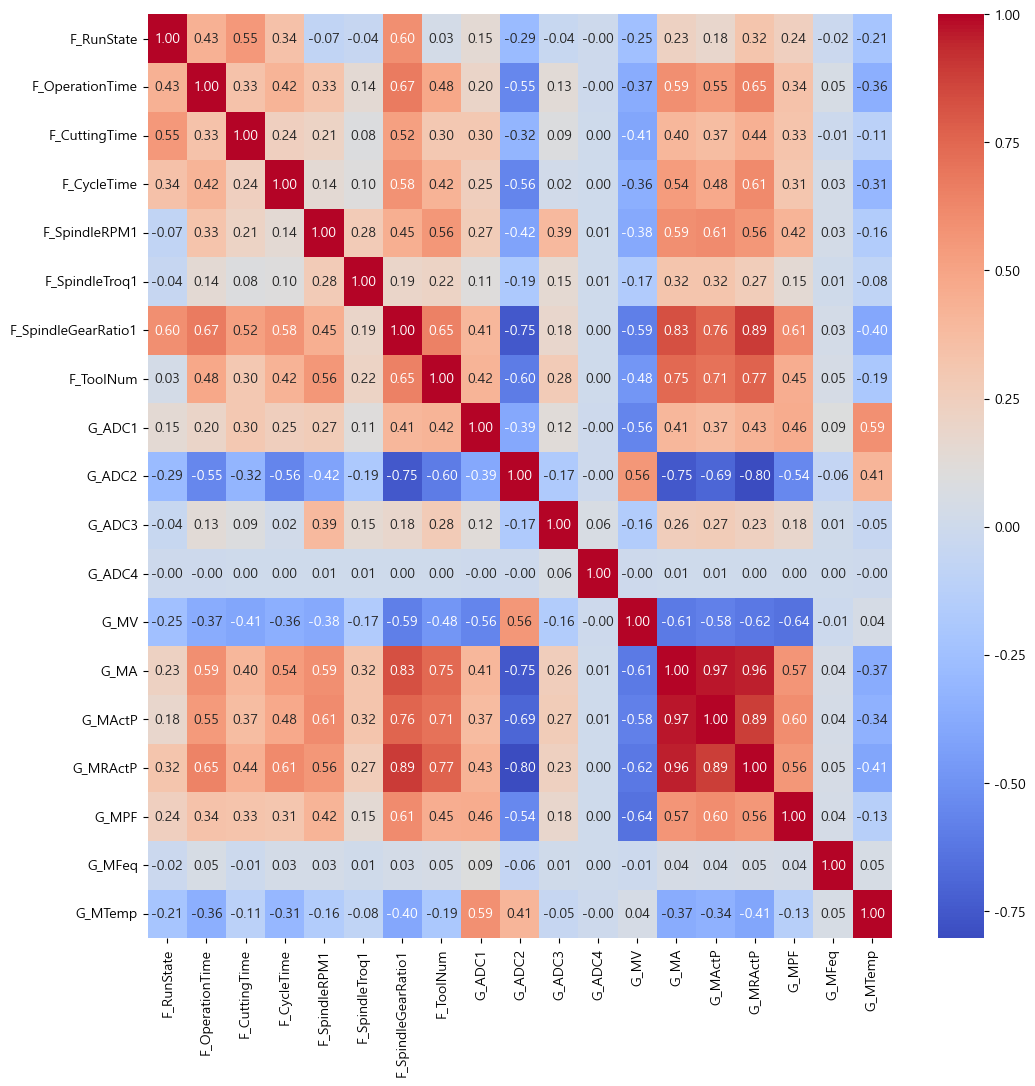

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data.iloc[:,1:].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

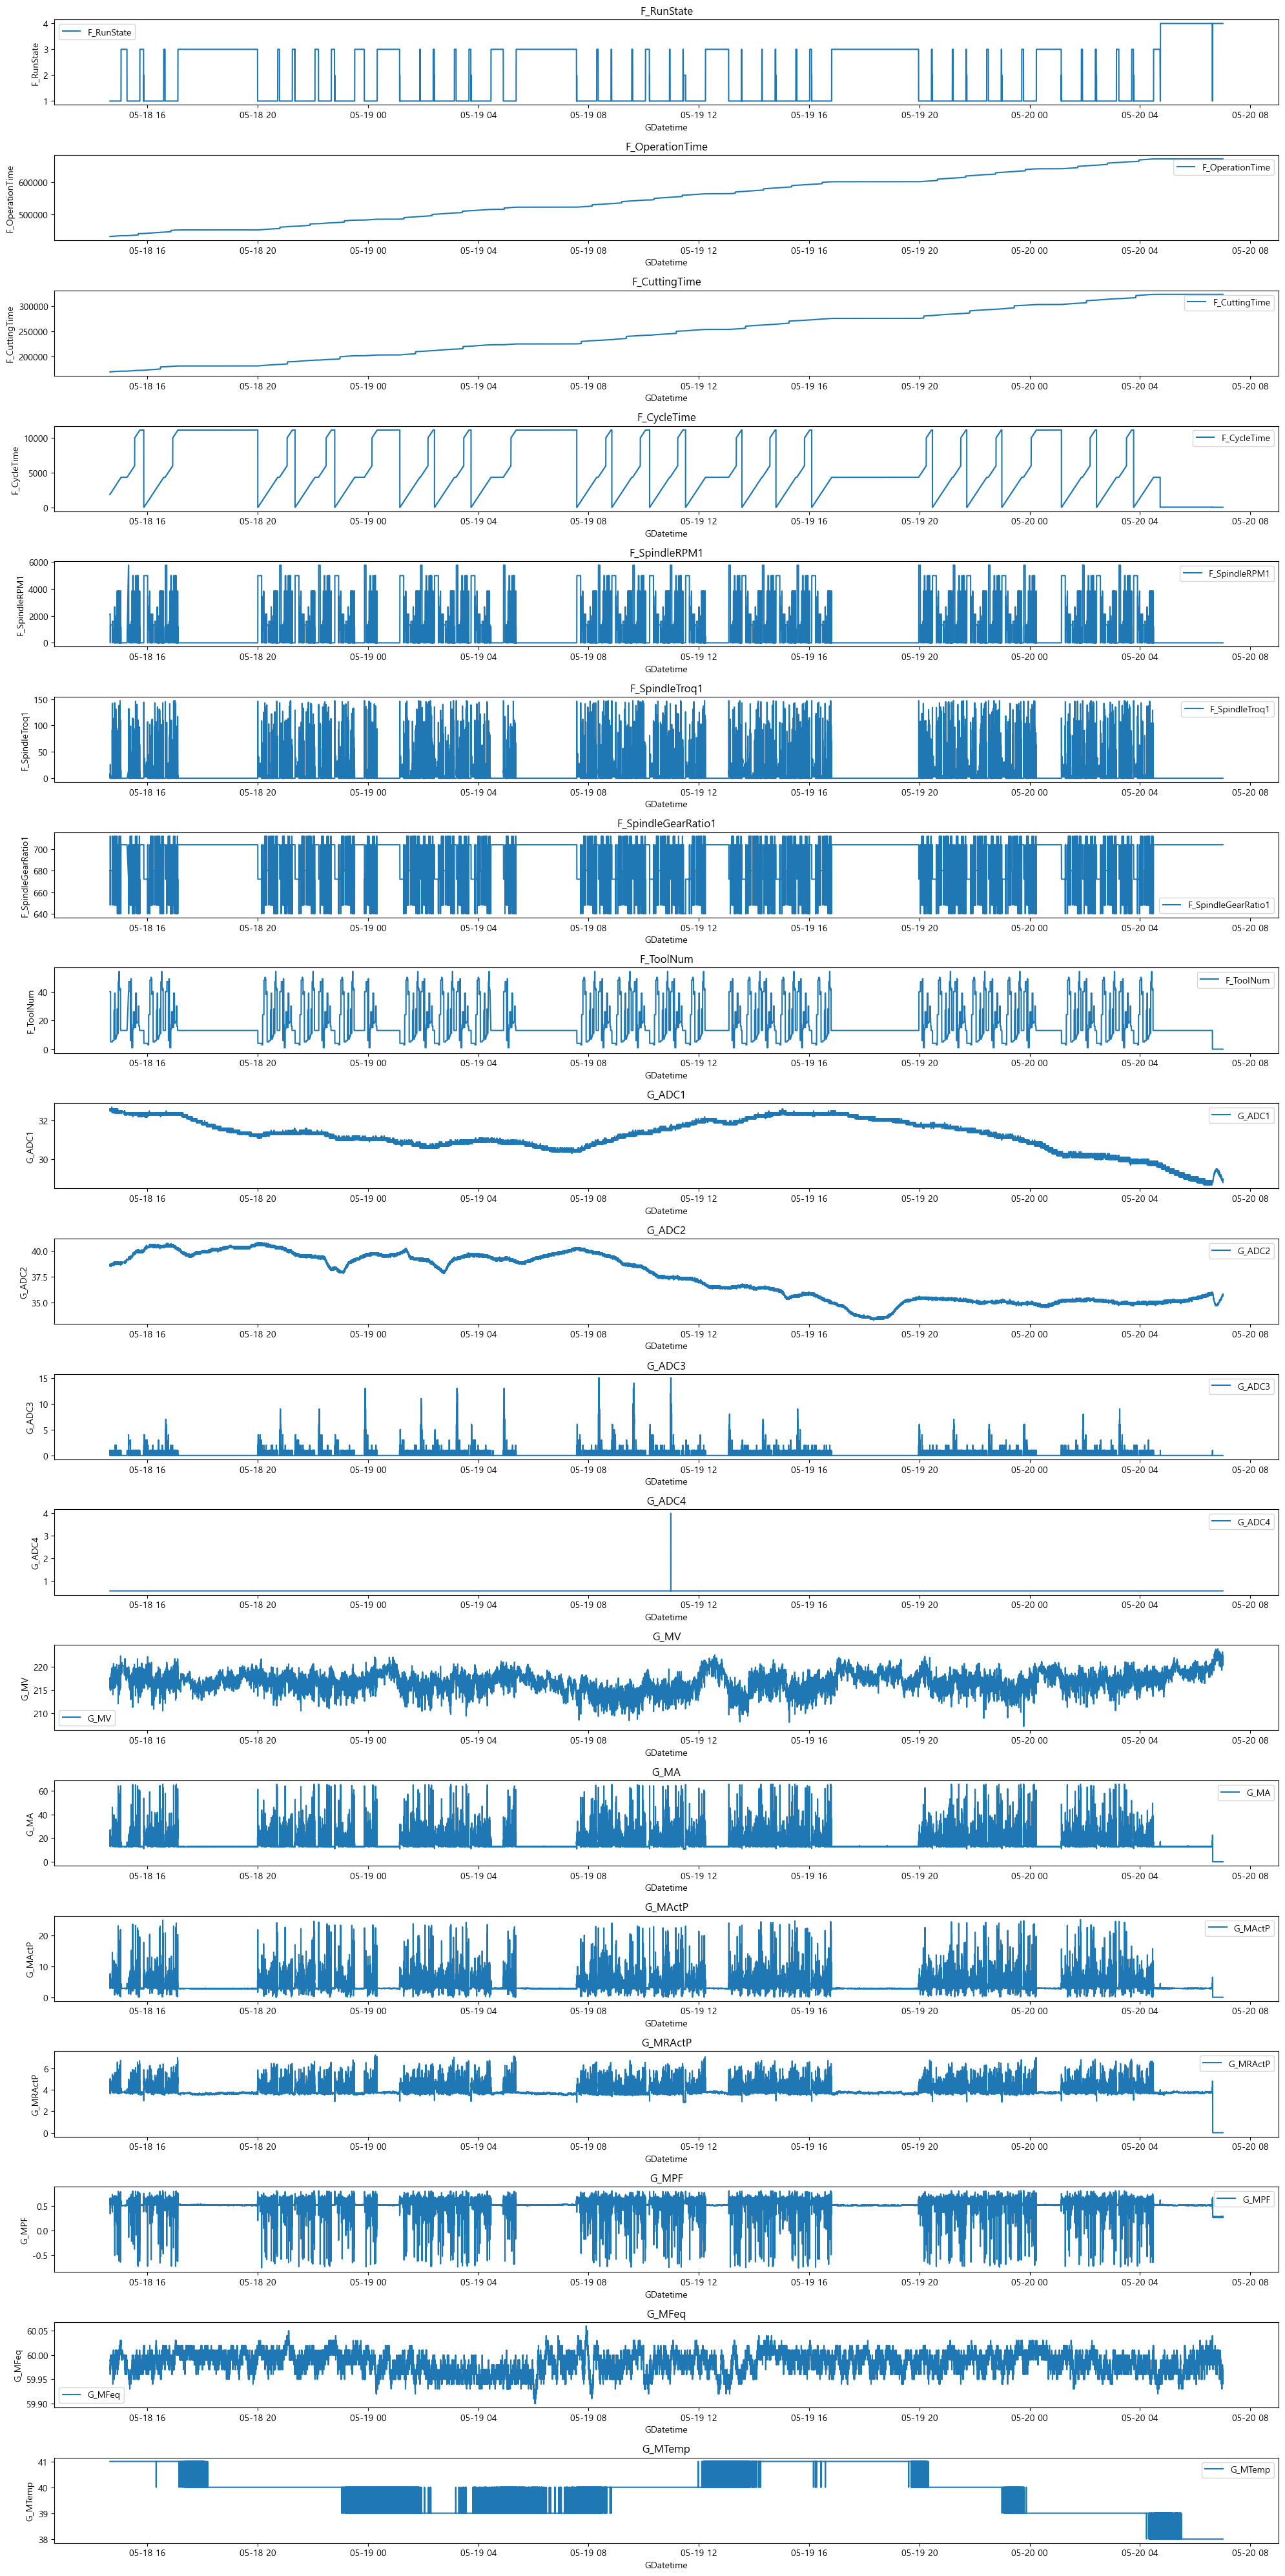

Time taken:  621.8019871711731


In [ ]:
start_time = time.time()

plt.figure(figsize=(20,40))
for i, column in enumerate(df1.columns):
    plt.subplot(len(df1.columns), 1, i+1)
    sns.lineplot(x=df1.index, y=df1[column], label=column)
    plt.title(column)
plt.tight_layout()
plt.show()

end_time = time.time()
print("Time taken: ", end_time - start_time)

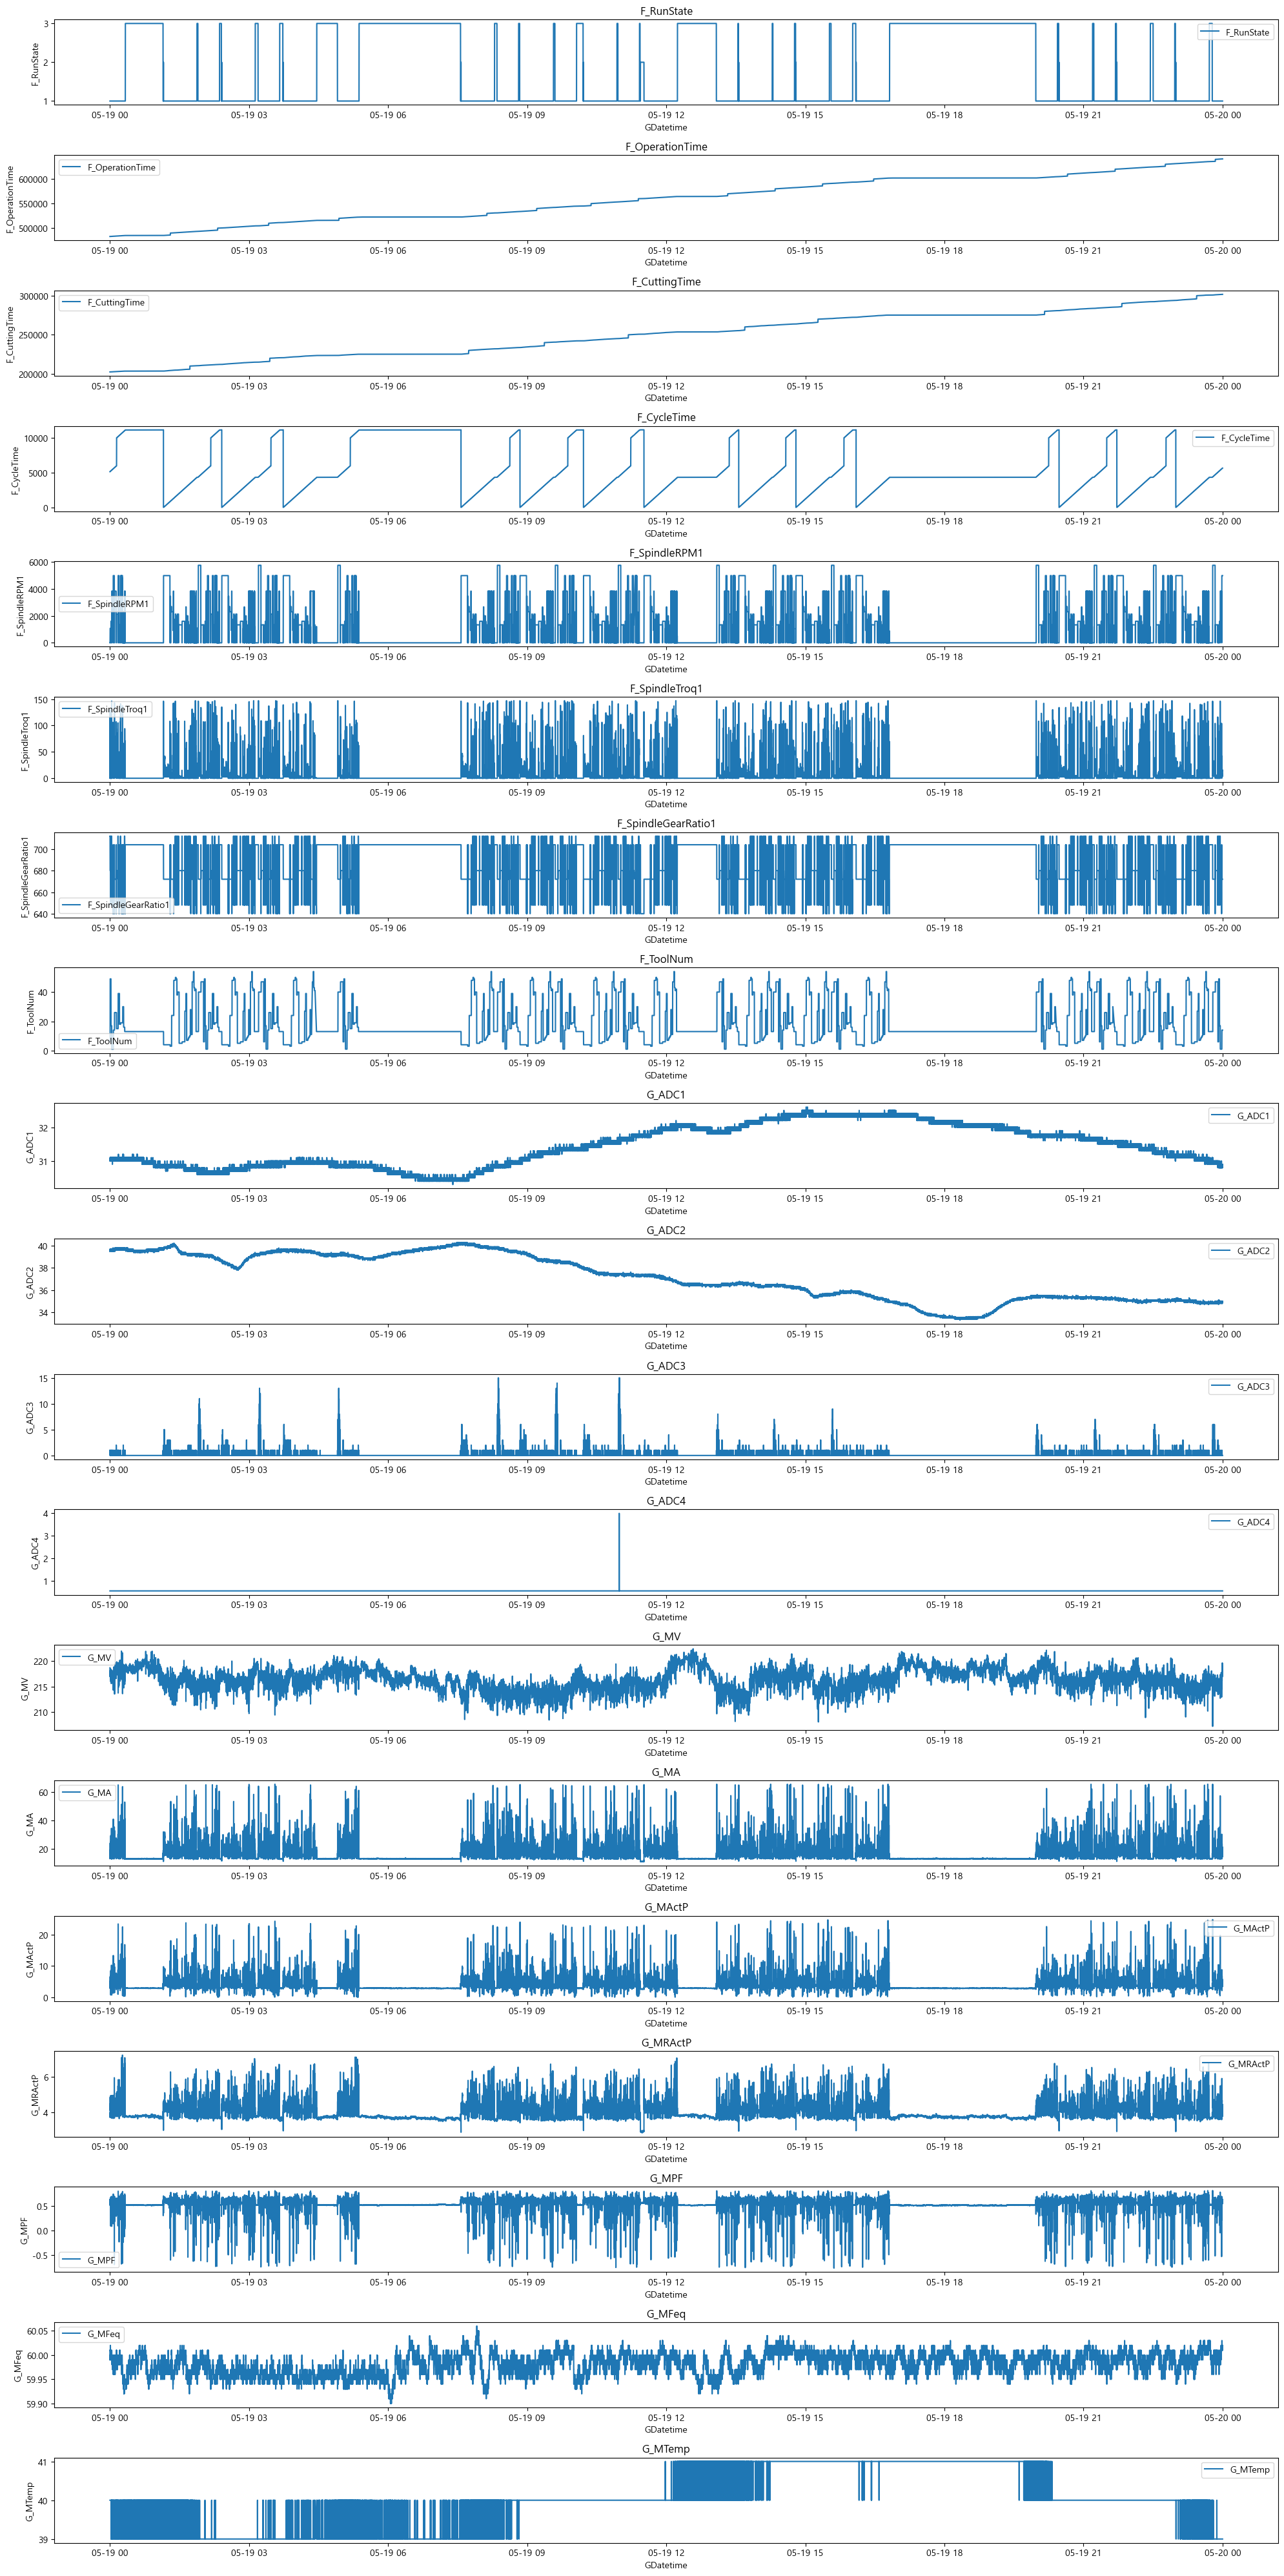

Time taken:  387.26386189460754


In [ ]:
start_time = time.time()

plt.figure(figsize=(20,40))
for i, column in enumerate(df1.loc['2023-05-19'].columns):
    plt.subplot(len(df1.loc['2023-05-19'].columns), 1, i+1)
    sns.lineplot(x=df1.loc['2023-05-19'].index, y=df1.loc['2023-05-19'][column], label=column)
    plt.title(column)
plt.tight_layout()
plt.show()

end_time = time.time()
print("Time taken: ", end_time - start_time)

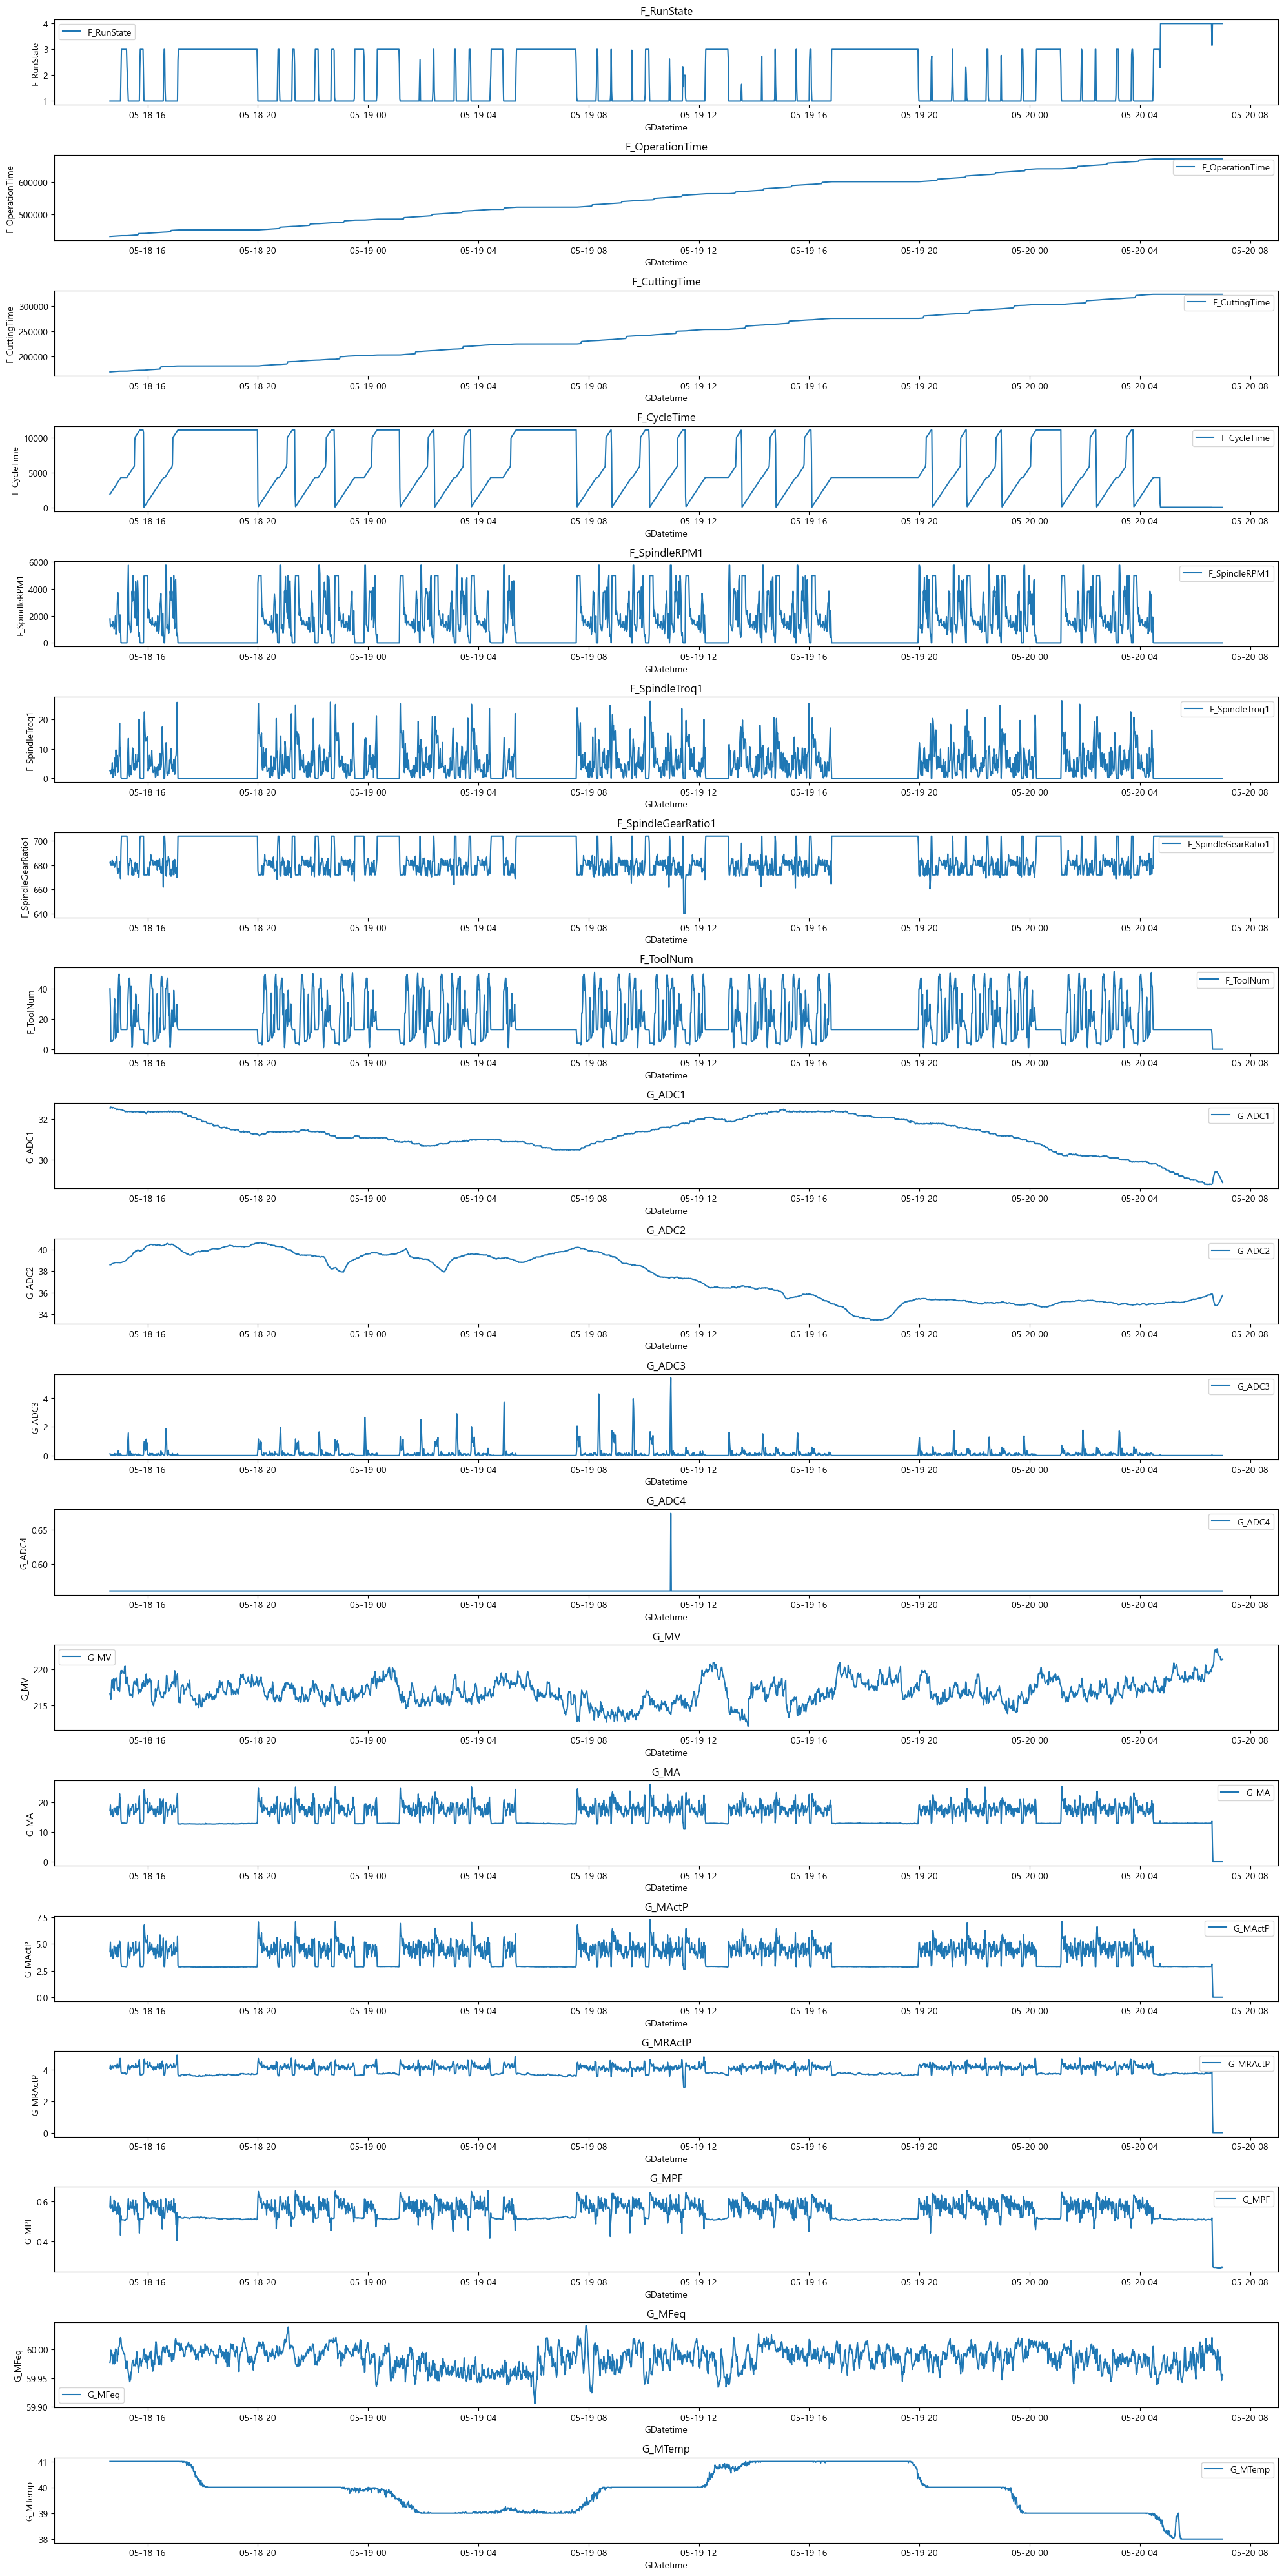

Time taken:  3.1100692749023438


In [ ]:
df1_60 = df1.resample('1T').mean()
# df1_60 = df1_60.iloc[60:]
start_time = time.time()

plt.figure(figsize=(20,40))
for i, column in enumerate(df1_60.columns):
    plt.subplot(len(df1_60.columns), 1, i+1)
    sns.lineplot(x=df1_60.index, y=df1_60[column], label=column)
    plt.title(column)
plt.tight_layout()
plt.show()

end_time = time.time()
print("Time taken: ", end_time - start_time)

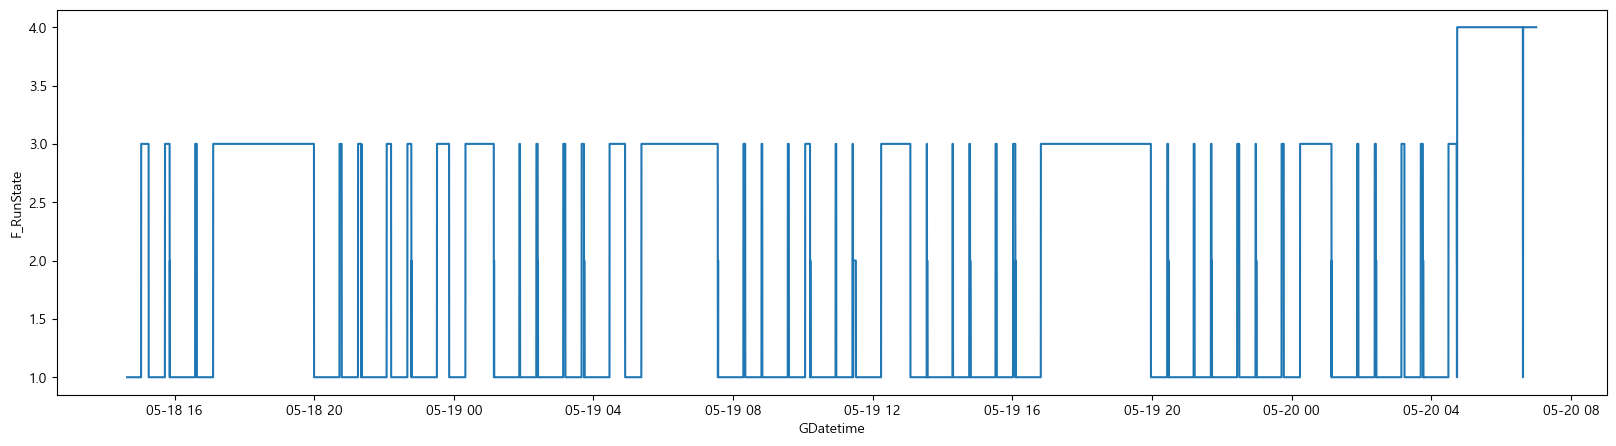

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(x=df1.index, y=df1['F_RunState'])
plt.show()

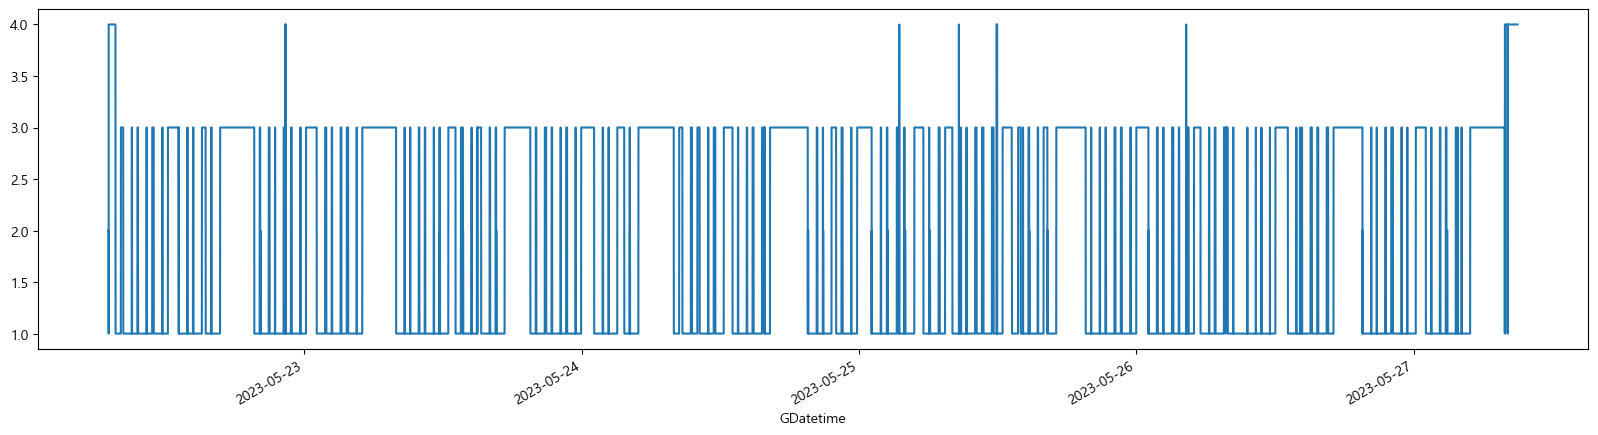

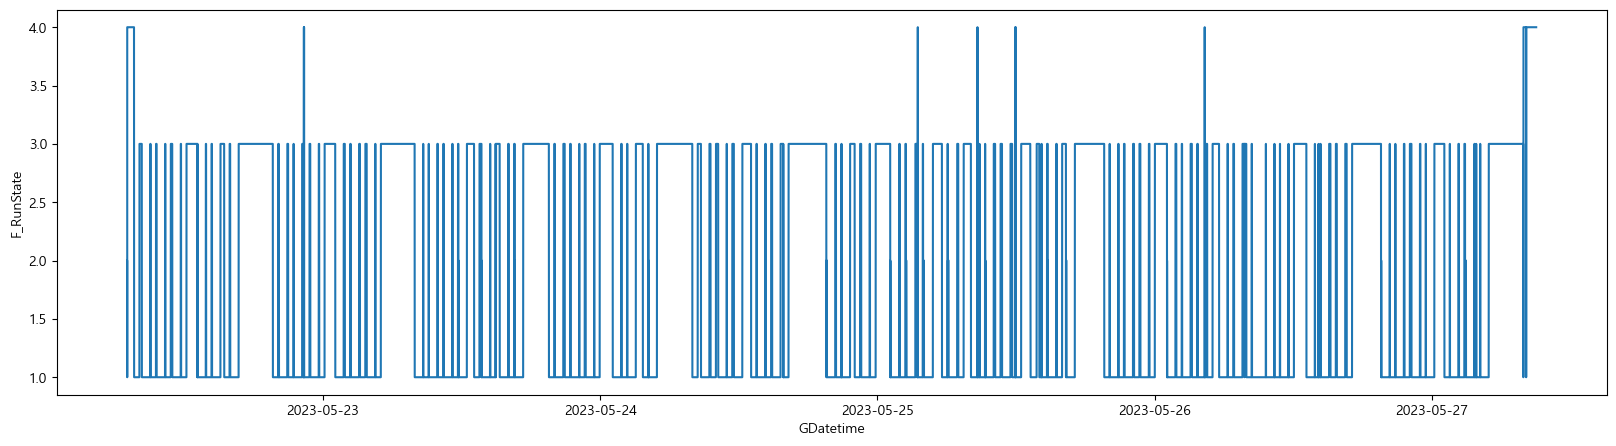

time :  110.79561066627502


In [ ]:
start_time = time.time()

plt.figure(figsize=(20,5))
sns.lineplot(x=data_list[1].index, y=data_list[1]['F_RunState'])
plt.show()

end_time = time.time()
print('time : ', end_time - start_time)

In [ ]:
df2 = data_list[1]
tmp = df2.loc['2023-05-23 07']
tmp[tmp['F_RunState'] == 1]

F_RunState  F_OperationTime  F_CuttingTime  F_CycleTime  \
GDatetime                                                                      
2023-05-23 07:56:43           1         822655.0       414439.0        11122   
2023-05-23 07:56:44           1         822656.0       414439.0        11123   
2023-05-23 07:56:45           1         822656.0       414439.0        11123   
2023-05-23 07:56:46           1         822657.0       414439.0        11124   
2023-05-23 07:56:47           1         822658.0       414439.0        11125   
...                         ...              ...            ...          ...   
2023-05-23 07:59:55           1         823001.0       414705.0          238   
2023-05-23 07:59:56           1         823002.0       414706.0          239   
2023-05-23 07:59:57           1         823003.0       414707.0          240   
2023-05-23 07:59:58           1         823004.0       414708.0          242   
2023-05-23 07:59:59           1         823004.0       414708.0          242   

                     F_SpindleRPM1  F_SpindleTroq1  F_SpindleGearRatio1  \
GDatetime                                                                 
2023-05-23 07:56:43            0.0             0.0                704.0   
2023-05-23 07:56:44            0.0             0.0                704.0   
2023-05-23 07:56:45            0.0             0.0                704.0   
2023-05-23 07:56:46            0.0             0.0                704.0   
2023-05-23 07:56:47            0.0             0.0                704.0   
...                            ...             ...                  ...   
2023-05-23 07:59:55         4987.0            19.0                672.0   
2023-05-23 07:59:56         4987.0            19.0                672.0   
2023-05-23 07:59:57         4987.0            19.0                672.0   
2023-05-23 07:59:58         4987.0            19.0                672.0   
2023-05-23 07:59:59         4987.0            19.0                672.0   

                     F_ToolNum  G_ADC1     G_ADC2  G_ADC3  G_ADC4        G_MV  \
GDatetime                                                                       
2023-05-23 07:56:43       13.0    29.5  34.200001     0.0    0.56  212.539993   
2023-05-23 07:56:44       13.0    29.5  34.099998     0.0    0.56  212.580002   
2023-05-23 07:56:45       13.0    29.5  34.099998     0.0    0.56  212.580002   
2023-05-23 07:56:46       13.0    29.5  34.099998     0.0    0.56  213.179993   
2023-05-23 07:56:47       13.0    29.5  34.200001     0.0    0.56  212.520004   
...                        ...     ...        ...     ...     ...         ...   
2023-05-23 07:59:55        4.0    29.5  34.099998     0.0    0.56  213.130005   
2023-05-23 07:59:56        4.0    29.5  34.099998     0.0    0.56  213.130005   
2023-05-23 07:59:57        4.0    29.5  34.099998     0.0    0.56  212.389999   
2023-05-23 07:59:58        4.0    29.5  34.099998     0.0    0.56  212.039993   
2023-05-23 07:59:59        4.0    29.5  34.099998     0.0    0.56  212.580002   

                          G_MA  G_MActP  G_MRActP  G_MPF     G_MFeq  G_MTemp  
GDatetime                                                                     
2023-05-23 07:56:43  12.997000    2.852     3.576  0.516  60.009998     39.0  
2023-05-23 07:56:44  18.676001    4.864     3.956  0.612  60.009998     39.0  
2023-05-23 07:56:45  18.676001    4.864     3.956  0.612  60.009998     39.0  
2023-05-23 07:56:46  17.212000    4.376     3.868  0.596  60.020000     39.0  
2023-05-23 07:56:47  16.841000    4.540     3.896  0.634  60.020000     39.0  
...                        ...      ...       ...    ...        ...      ...  
2023-05-23 07:59:55  21.882000    5.992     4.328  0.642  60.000000     39.0  
2023-05-23 07:59:56  21.882000    5.992     4.328  0.642  60.000000     39.0  
2023-05-23 07:59:57  21.702000    5.964     4.264  0.646  60.000000     39.0  
2023-05-23 07:59:58  21.892000    5.968     4.272  0.642  60.000000     39.0  
20

<Axes: xlabel='GDatetime'>

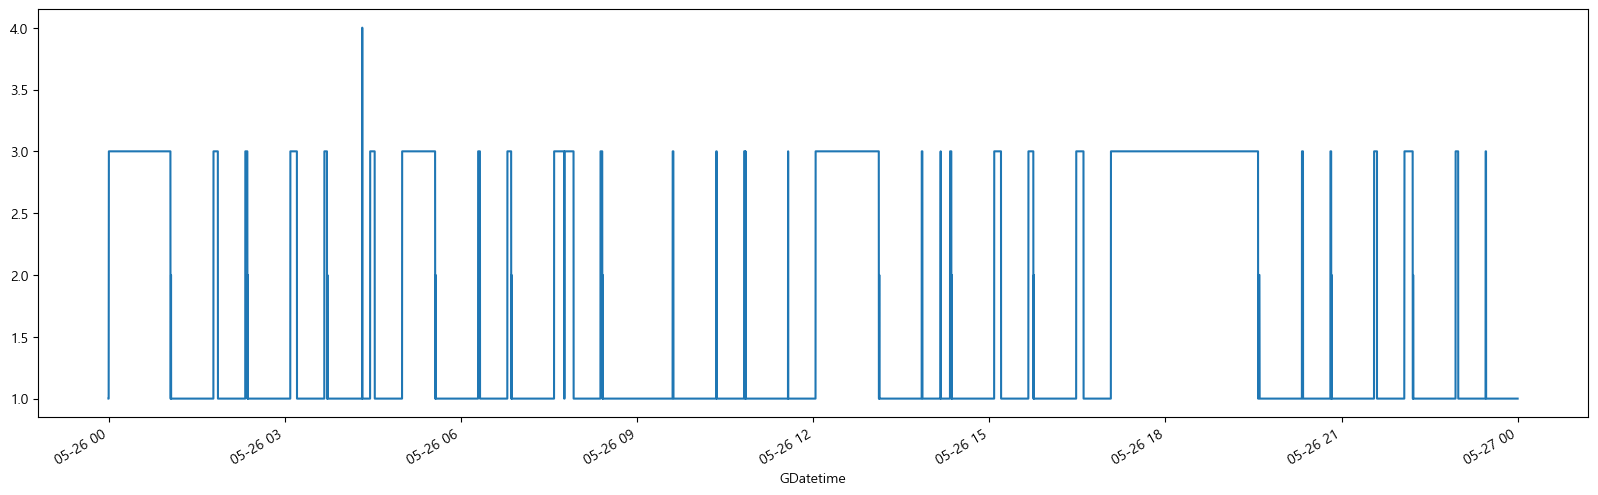

In [ ]:
df2.loc['2023-05-26']['F_RunState'].plot(figsize=(20,6))

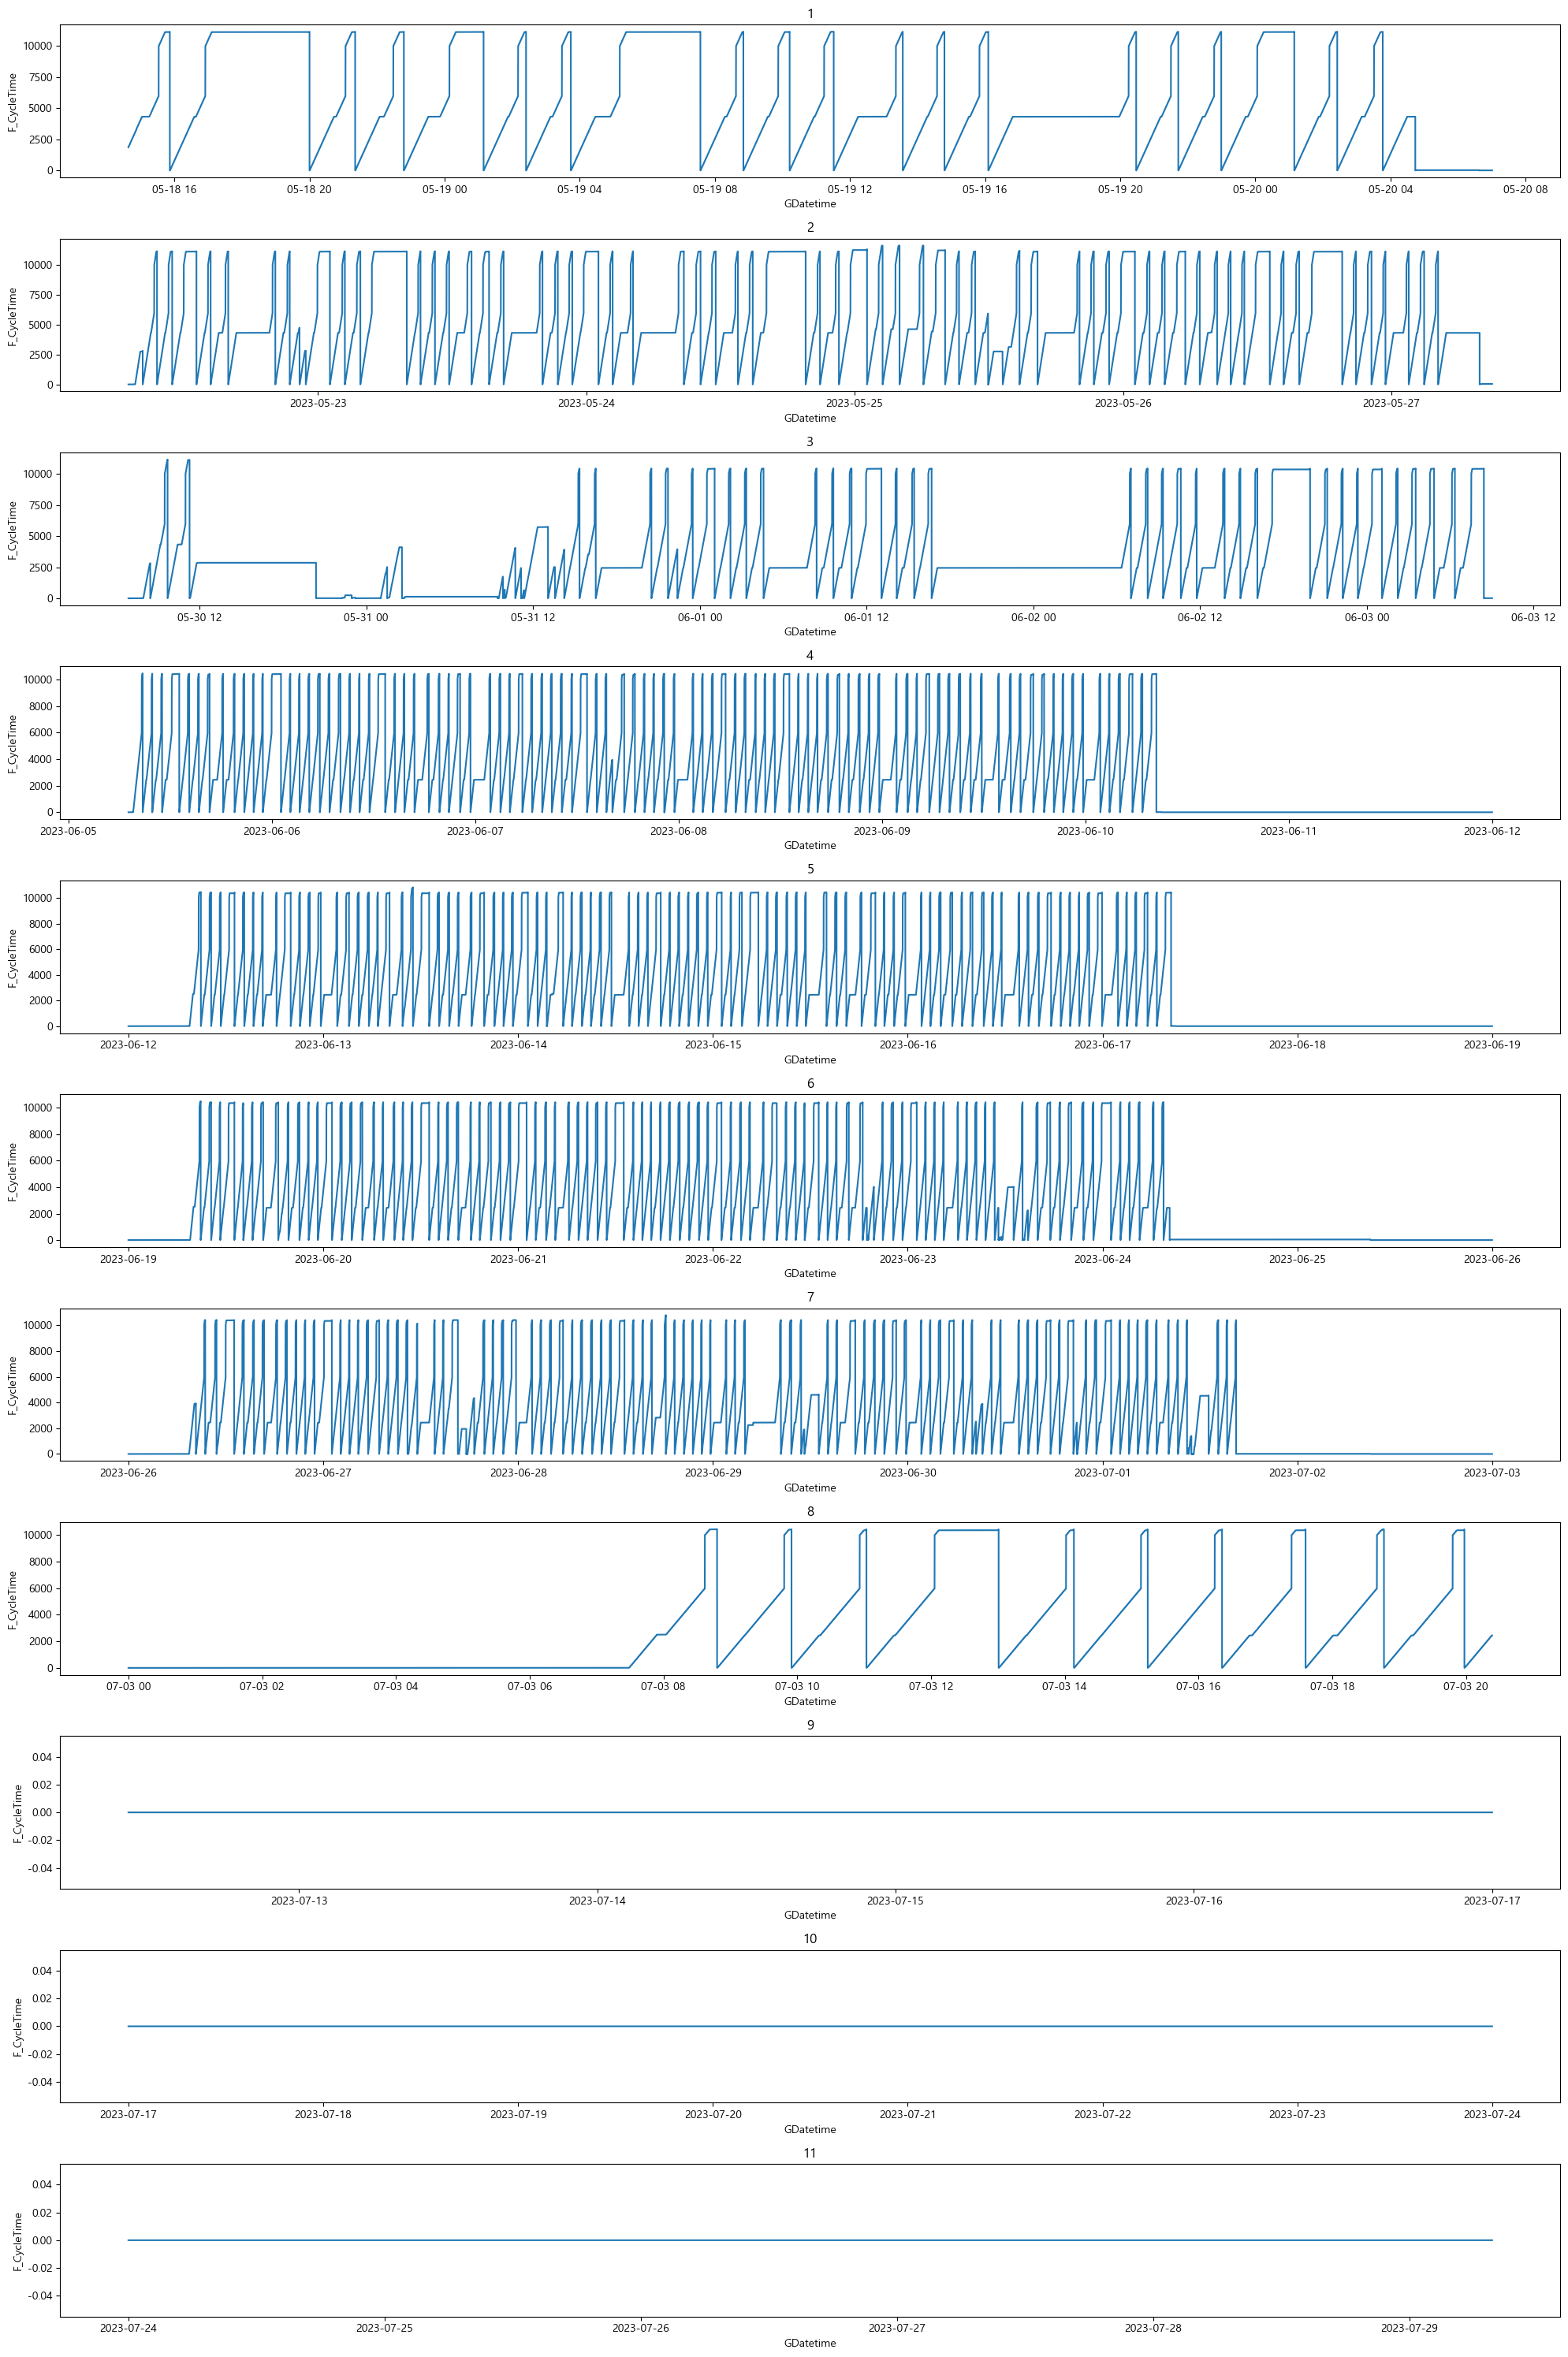

Total time taken: 387.26386189460754


In [ ]:
start_time

plt.figure(figsize=(20,30))
for i, week in enumerate(data_list):
    plt.subplot(len(data_list), 1, i+1)
    sns.lineplot(x=week.index, y=week['F_CycleTime'])
    plt.title(i+1)
plt.tight_layout()
plt.show()

end_time
print('Total time taken:', end_time - start_time)

In [ ]:
data['F_RunState'].value_counts()

F_RunState
1    1931692
0    1515922
3     633724
2     421826
4     273567
5          3
Name: count, dtype: int64

In [4]:
data['F_RunState'] = data['F_RunState'].map(lambda x: 1 if x == 3 else 0)

In [5]:
data['F_RunState'].value_counts()

F_RunState
0    4143010
1     633724
Name: count, dtype: int64

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,8:], data['F_RunState'], stratify=data['F_RunState'], test_size=0.3, random_state=42)

std = StandardScaler()
X_train_sc = std.fit_transform(X_train)
X_test_sc = std.transform(X_test)

start_time = time.time()

dtc = DecisionTreeClassifier()
dtc.fit(X_train_sc, y_train)

end_time = time.time()
print('Time taken :', end_time - start_time)

Time taked : 14.3244948387146


In [23]:
X_train

G_ADC1     G_ADC2  G_ADC3  G_ADC4        G_MV  \
GDatetime                                                               
2023-07-03 06:24:56  28.500000  61.099998     0.0    0.56  223.419998   
2023-07-27 21:44:23  35.599998  49.599998     0.0    0.56  219.500000   
2023-06-14 18:13:41  35.200001  34.799999     0.0    0.56  215.600006   
2023-07-13 20:41:51  32.799999  57.299999     0.0    0.56  217.820007   
2023-06-25 22:45:29  27.299999  58.900002     0.0    0.56  225.710007   
...                        ...        ...     ...     ...         ...   
2023-07-27 09:49:43  33.299999  54.200001     0.0    0.56  218.059998   
2023-06-23 11:28:07  36.000000  34.000000     0.0    0.56  217.970001   
2023-07-27 07:43:02  32.599998  55.099998     0.0    0.56  217.710007   
2023-07-26 09:12:53  32.799999  57.500000     0.0    0.56  217.380005   
2023-07-21 22:12:10  34.500000  41.900002     0.0    0.56  218.149994   

                          G_MA  G_MActP  G_MRActP  G_MPF     G_MFeq  G_MTemp  
GDatetime                                                                     
2023-07-03 06:24:56   0.063000    0.004     0.004  0.256  59.990002     42.0  
2023-07-27 21:44:23   0.061000    0.004     0.004  0.269  59.990002     47.0  
2023-06-14 18:13:41  17.412001    4.456     4.128  0.593  59.980000     43.0  
2023-07-13 20:41:51   0.063000    0.004     0.004  0.263  59.970001     45.0  
2023-06-25 22:45:29   0.065000    0.004     0.004  0.245  59.959999     41.0  
...                        ...      ...       ...    ...        ...      ...  
2023-07-27 09:49:43   0.063000    0.004     0.004  0.264  60.000000     46.0  
2023-06-23 11:28:07  14.555000    3.460     4.056  0.545  60.000000     44.0  
2023-07-27 07:43:02   0.061000    0.004     0.004  0.270  60.000000     45.0  
2023-07-26 09:12:53   0.063000    0.004     0.004  0.264  60.009998     45.0  
2023-07-21 22:12:10   0.931000    0.292     0.060  0.722  59.970001     45.0  

[3343713 rows x 11 columns]

In [24]:
p_test = dtc.predict(X_test_sc)
p_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score

print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1242904
           1       0.95      0.96      0.95    190117

    accuracy                           0.99   1433021
   macro avg       0.97      0.97      0.97   1433021
weighted avg       0.99      0.99      0.99   1433021



In [27]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
rfc = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rfc.fit(X_train_sc, y_train)
end_time = time.time()
print('Time take :', end_time - start_time)

Time take : 175.5725793838501


In [ ]:
p_test = rfc.predict(X_test_sc)

In [ ]:
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1161039
           1       0.94      0.99      0.96    271982

    accuracy                           0.99   1433021
   macro avg       0.97      0.99      0.98   1433021
weighted avg       0.99      0.99      0.99   1433021

